In [180]:
TatatincTrainingDataPath = "D:\Study\Careers\Machine Learning\\titanic\\train.csv"
TatatincTestingDataPath = "D:\Study\Careers\Machine Learning\\titanic\\test.csv"
TatatincOutputDataPath = "D:\Study\Careers\Machine Learning\\titanic\\gender_submission.csv"

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import string
import statistics as sts

from math import ceil

In [182]:
def LoadTatanicData(TataincFilePath):
    #print(TataincFilePath)
    return pd.read_csv(TataincFilePath)

In [183]:
TrainingData = LoadTatanicData(TatatincTrainingDataPath)

In [184]:
TrainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [186]:
TrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ED8D46198>,
      dtype=object)

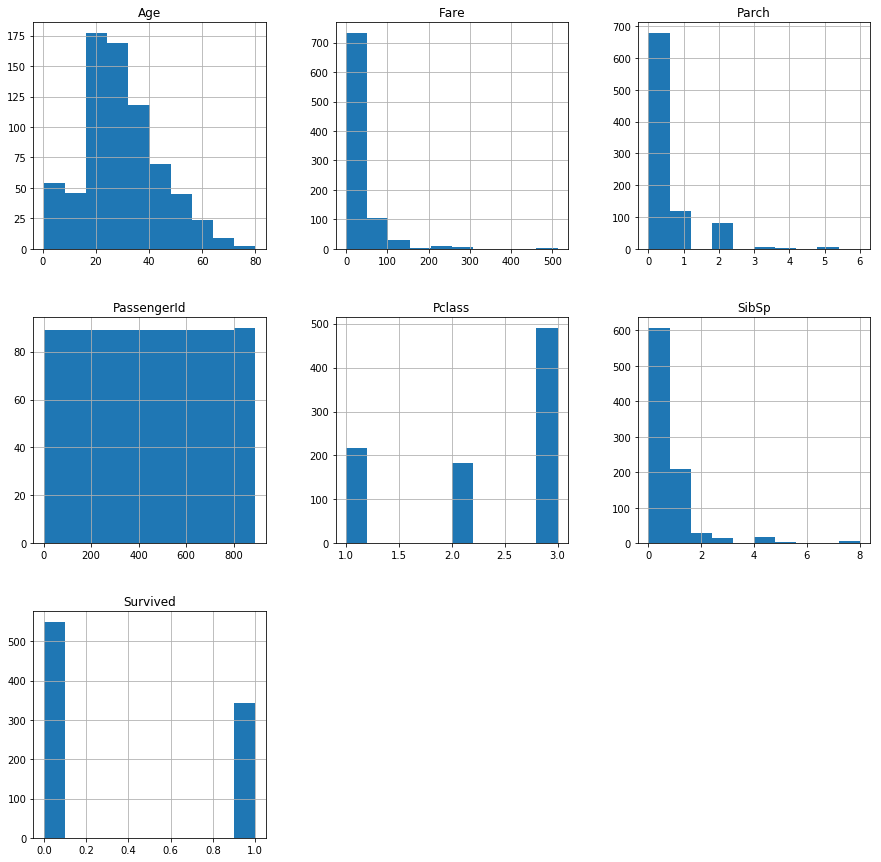

In [187]:
TrainingData.hist(bins = 10, figsize = (15,15))

In [188]:
def SubStringInString (BigString, SubStrings):
    for SubString in SubStrings:
        if str.find(BigString , SubString) != -1:
            return SubString
    return np.nan

In [189]:
TitleList = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev','Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme',
             'Countess','Don', 'Jonkheer']

TrainingData['Title'] = TrainingData['Name'].map(lambda x : SubStringInString(x, TitleList))

TrainingData.head(6)

In [190]:
TrainingData['Cabin'] = TrainingData['Cabin'].fillna('Unknown')

TrainingData.head()

In [191]:
CabinList = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

TrainingData['Deck'] = TrainingData['Cabin'].map(lambda x : SubStringInString(x ,CabinList))
#TrainingData['CabinNumber'] = TrainingData['Cabin'].replace(TrainingData['Cabin'].map(lambda x : SubStringInString(x ,CabinList)),"")

In [192]:
AgeMean = TrainingData.loc[:,'Age'].mean()
print(AgeMean)
TrainingData['Age'] = round(TrainingData['Age'].fillna(AgeMean),0)

29.69911764705882


In [193]:
EmbarkedMode = TrainingData.loc[:,'Embarked'].mode()

In [194]:
TrainingData['Embarked'] = TrainingData['Embarked'].fillna(EmbarkedMode)

In [195]:
TrainingData['Relatives'] = TrainingData['SibSp'] + TrainingData['Parch']

In [196]:
TrainingData['FareClass'] = round(TrainingData['Fare'] / ((max(TrainingData['Fare']) - min(TrainingData['Fare']))/ 50))

In [197]:
TrainingData["CabinNum"] = TrainingData["Cabin"].str.extract('(\d+)')
TrainingData["CabinNum"] = TrainingData["CabinNum"].fillna(0)
TrainingData["CabinNum"] = TrainingData.CabinNum.astype(int)

TrainingData["CabinNum"].value_counts()

In [198]:
TrainingData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Relatives,FareClass,CabinNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Unknown,1,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,7.0,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Unknown,0,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,5.0,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Unknown,0,1.0,0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Unknown,Q,Mr,Unknown,0,1.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,E,0,5.0,46
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,Master,Unknown,4,2.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,Mrs,Unknown,2,1.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,Mrs,Unknown,1,3.0,0


In [199]:
TrainingDataPrapared = TrainingData.drop("Survived" , axis =1)
TrainingDataPrapared = TrainingDataPrapared.drop("Name" , axis =1)
TrainingDataPrapared = TrainingDataPrapared.drop("Ticket" , axis =1)
TrainingDataPrapared = TrainingDataPrapared.drop("Cabin" , axis =1)
TrainingDataPrapared = TrainingDataPrapared.drop("Fare" , axis =1)

TrainingDataPrapared.info()

In [200]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

LEnc = LabelEncoder()
TrainingDataPrapared["Sex_Type"] = LEnc.fit_transform(TrainingDataPrapared["Sex"])
TrainingDataPrapared["Title_Type"] = LEnc.fit_transform(TrainingDataPrapared["Title"])
TrainingDataPrapared["Deck_Type"] = LEnc.fit_transform(TrainingDataPrapared["Deck"])

#LBin = LabelBinarizer()
#LBinResult = LBin.fit_transform(TrainingDataPrapared["Embarked"])

TrainingDataPrapared = pd.get_dummies(TrainingDataPrapared , columns=["Embarked"])

In [201]:
TrainingDataPrapared.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Title,Deck,Relatives,FareClass,CabinNum,Sex_Type,Title_Type,Deck_Type,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,Mr,Unknown,1,1.0,0,1,11,8,0,0,1
1,2,1,female,38.0,1,0,Mrs,C,1,7.0,85,0,12,2,1,0,0
2,3,3,female,26.0,0,0,Miss,Unknown,0,1.0,0,0,8,8,0,0,1
3,4,1,female,35.0,1,0,Mrs,C,1,5.0,123,0,12,2,0,0,1
4,5,3,male,35.0,0,0,Mr,Unknown,0,1.0,0,1,11,8,0,0,1
5,6,3,male,30.0,0,0,Mr,Unknown,0,1.0,0,1,11,8,0,1,0
6,7,1,male,54.0,0,0,Mr,E,0,5.0,46,1,11,4,0,0,1
7,8,3,male,2.0,3,1,Master,Unknown,4,2.0,0,1,7,8,0,0,1
8,9,3,female,27.0,0,2,Mrs,Unknown,2,1.0,0,0,12,8,0,0,1
9,10,2,female,14.0,1,0,Mrs,Unknown,1,3.0,0,0,12,8,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ED8D4A828>,
      dtype=object)

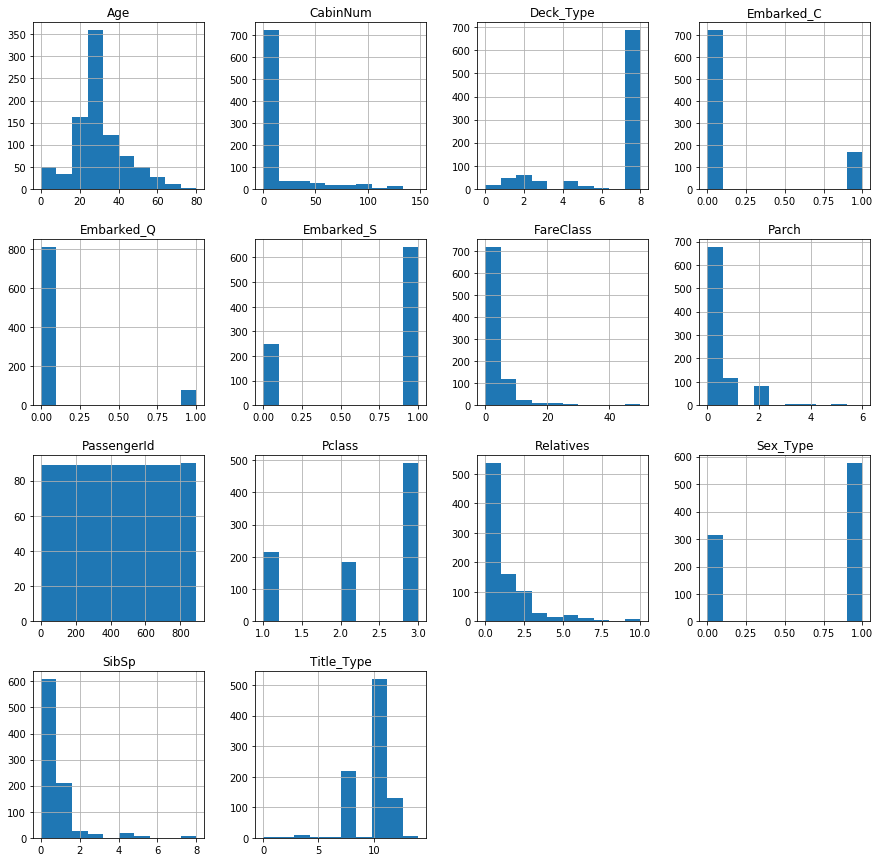

In [202]:
TrainingDataPrapared.hist(bins = 10, figsize = (15,15))

In [203]:
TrainingDataPrapared.to_excel("D:\Study\Careers\Machine Learning\\titanic\\Prepared.xlsx")

In [204]:
TrainingDataPrapared = TrainingDataPrapared.drop("Sex" , axis =1)
TrainingDataPrapared = TrainingDataPrapared.drop("Title" , axis =1)
TrainingDataPrapared = TrainingDataPrapared.drop("Deck" , axis =1)

In [205]:
TrainingDataPrapared.head()

,PassengerId,Pclass,Age,SibSp,Parch,Relatives,FareClass,CabinNum,Sex_Type,Title_Type,Deck_Type,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,1,1.0,0,1,11,8,0,0,1
1,2,1,38.0,1,0,1,7.0,85,0,12,2,1,0,0
2,3,3,26.0,0,0,0,1.0,0,0,8,8,0,0,1
3,4,1,35.0,1,0,1,5.0,123,0,12,2,0,0,1
4,5,3,35.0,0,0,0,1.0,0,1,11,8,0,0,1


In [206]:
TrainingDataLabel = TrainingData["Survived"].copy()

In [207]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(TrainingDataPrapared, TrainingDataLabel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [208]:
TestingData = LoadTatanicData(TatatincTestingDataPath)
TestingData['Title'] = TestingData['Name'].map(lambda x : SubStringInString(x, TitleList))
TestingData['Cabin'] = TestingData['Cabin'].fillna('Unknown')
TestingData['Deck'] = TestingData['Cabin'].map(lambda x : SubStringInString(x ,CabinList))
AgeMean = TestingData.loc[:,'Age'].mean()
TestingData['Age'] = round(TestingData['Age'].fillna(AgeMean),0)
EmbarkedMode = TestingData.loc[:,'Embarked'].mode()
TestingData['Embarked'] = TestingData['Embarked'].fillna(EmbarkedMode)
TestingData['Relatives'] = TestingData['SibSp'] + TestingData['Parch']
FareMean = TestingData.loc[:,'Fare'].mean()
TestingData['Fare'] = round(TestingData['Fare'].fillna(FareMean),0)
TestingData['FareClass'] = round(TestingData['Fare'] / ((max(TestingData['Fare']) - min(TestingData['Fare']))/ 50))
TestingData["CabinNum"] = TestingData["Cabin"].str.extract('(\d+)')
TestingData["CabinNum"] = TestingData["CabinNum"].fillna(0)
TestingData["CabinNum"] = TestingData.CabinNum.astype(int)
TestingData = TestingData.drop("Name" , axis =1)
TestingData = TestingData.drop("Ticket" , axis =1)
TestingData = TestingData.drop("Cabin" , axis =1)
TestingData = TestingData.drop("Fare" , axis =1)
TestingData["Sex_Type"] = LEnc.fit_transform(TestingData["Sex"])
TestingData["Title_Type"] = LEnc.fit_transform(TestingData["Title"])
TestingData["Deck_Type"] = LEnc.fit_transform(TestingData["Deck"])
TestingData = pd.get_dummies(TestingData , columns=["Embarked"])
TestingData = TestingData.drop("Sex" , axis =1)
TestingData = TestingData.drop("Title" , axis =1)
TestingData = TestingData.drop("Deck" , axis =1)
TestingData.to_excel("D:\Study\Careers\Machine Learning\\titanic\\TestingPrepared.xlsx")

In [209]:
TestingData.head()

,PassengerId,Pclass,Age,SibSp,Parch,Relatives,FareClass,CabinNum,Sex_Type,Title_Type,Deck_Type,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.0,0,0,0,1.0,0,1,5,7,0,1,0
1,893,3,47.0,1,0,1,1.0,0,0,6,7,0,0,1
2,894,2,62.0,0,0,0,1.0,0,1,5,7,0,1,0
3,895,3,27.0,0,0,0,1.0,0,1,5,7,0,0,1
4,896,3,22.0,1,1,2,1.0,0,0,6,7,0,0,1


In [230]:
Prediction = (np.round(LinReg.predict(TestingData),0)).astype(int)

print(Prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [223]:
#pd.DataFrame(LinReg.predict(TestingData)).to_excel("D:\Study\Careers\Machine Learning\\titanic\\Output.xlsx")

In [234]:
OutputData = LoadTatanicData(TatatincOutputDataPath)

Survived = OutputData["Survived"].values

print(Survived)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


from sklearn.metrics import mean_squared_error

LinMSE = mean_squared_error(Survived , Prediction)
print(np.sqrt(LinMSE))

In [239]:
Error = np.mean(Survived != Prediction)

In [240]:
print(Error)

0.06937799043062201


In [241]:
print("Accuracy: " +str((1-Error)*100) + "%" )

Accuracy: 93.0622009569378%
